In [1]:
#Defining local path 
your_local_path="C:/Users/nlakshman/Desktop/Grab Challenge/Traffic Management/"

In [2]:
#Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Reading input file
traf_mgmt_file=your_local_path+'training.csv'
print(traf_mgmt_file)
traf_mgmt_data=pd.read_csv(traf_mgmt_file)
#Head of input
traf_mgmt_data.head()

C:/Users/nlakshman/Desktop/Grab Challenge/Traffic Management/training.csv


,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468


In [4]:
#Formatting day and timestamp fields to default datetime format
from datetime import datetime,date,time
traf_mgmt_data['date']=pd.to_datetime(traf_mgmt_data['day'],unit='D')
traf_mgmt_data['time']=pd.to_datetime(traf_mgmt_data['timestamp'],format='%H:%M').dt.time

In [5]:
#Merging the formatted date and timestamp
traf_mgmt_data['datetim']=traf_mgmt_data.apply(lambda t : pd.datetime.combine(t['date'],t['time']),1)

In [6]:
#Setting datetime as index and sorting
traf_mgmt_data=(traf_mgmt_data.sort_values(by=['datetim'])).set_index(['datetim'])
traf_mgmt_data.tail()

,geohash6,day,timestamp,demand,date,time
datetim,,,,,,
1970-03-03 23:45:00,qp09sw,61,23:45,0.035813,1970-03-03,23:45:00
1970-03-03 23:45:00,qp03zh,61,23:45,0.010722,1970-03-03,23:45:00
1970-03-03 23:45:00,qp09dm,61,23:45,0.015853,1970-03-03,23:45:00
1970-03-03 23:45:00,qp09u2,61,23:45,0.023380,1970-03-03,23:45:00
1970-03-03 23:45:00,qp03wz,61,23:45,0.159342,1970-03-03,23:45:00


In [7]:
#Converting Geohash to its respective Latitude and Longitude
import geohash2 as pgh
traf_mgmt_data['latlong']=traf_mgmt_data['geohash6'].apply(lambda x:pgh.decode(x))
traf_mgmt_data.tail()

,geohash6,day,timestamp,demand,date,time,latlong
datetim,,,,,,,
1970-03-03 23:45:00,qp09sw,61,23:45,0.035813,1970-03-03,23:45:00,"(-5.33, 90.9)"
1970-03-03 23:45:00,qp03zh,61,23:45,0.010722,1970-03-03,23:45:00,"(-5.29, 90.7)"
1970-03-03 23:45:00,qp09dm,61,23:45,0.015853,1970-03-03,23:45:00,"(-5.33, 90.8)"
1970-03-03 23:45:00,qp09u2,61,23:45,0.023380,1970-03-03,23:45:00,"(-5.31, 90.9)"
1970-03-03 23:45:00,qp03wz,61,23:45,0.159342,1970-03-03,23:45:00,"(-5.32, 90.7)"


In [8]:
#Splitting the latitude and longitude
traf_mgmt_data[['lat','long']]=pd.DataFrame(traf_mgmt_data['latlong'].tolist(),index=traf_mgmt_data.index)
traf_mgmt_data.tail()

,geohash6,day,timestamp,demand,date,time,latlong,lat,long
datetim,,,,,,,,,
1970-03-03 23:45:00,qp09sw,61,23:45,0.035813,1970-03-03,23:45:00,"(-5.33, 90.9)",-5.33,90.9
1970-03-03 23:45:00,qp03zh,61,23:45,0.010722,1970-03-03,23:45:00,"(-5.29, 90.7)",-5.29,90.7
1970-03-03 23:45:00,qp09dm,61,23:45,0.015853,1970-03-03,23:45:00,"(-5.33, 90.8)",-5.33,90.8
1970-03-03 23:45:00,qp09u2,61,23:45,0.023380,1970-03-03,23:45:00,"(-5.31, 90.9)",-5.31,90.9
1970-03-03 23:45:00,qp03wz,61,23:45,0.159342,1970-03-03,23:45:00,"(-5.32, 90.7)",-5.32,90.7


In [9]:
#To visualize the demand variation with respect to time
traf_mgmt_grp=traf_mgmt_data.groupby(traf_mgmt_data.index).mean()
traf_mgmt_grp

,day,demand
datetim,,
1970-01-02 00:00:00,1,0.050461
1970-01-02 00:15:00,1,0.051678
1970-01-02 00:30:00,1,0.054018
1970-01-02 00:45:00,1,0.057015
1970-01-02 01:00:00,1,0.061216
1970-01-02 01:15:00,1,0.063503
1970-01-02 01:30:00,1,0.068374
1970-01-02 01:45:00,1,0.071552
1970-01-02 02:00:00,1,0.074103


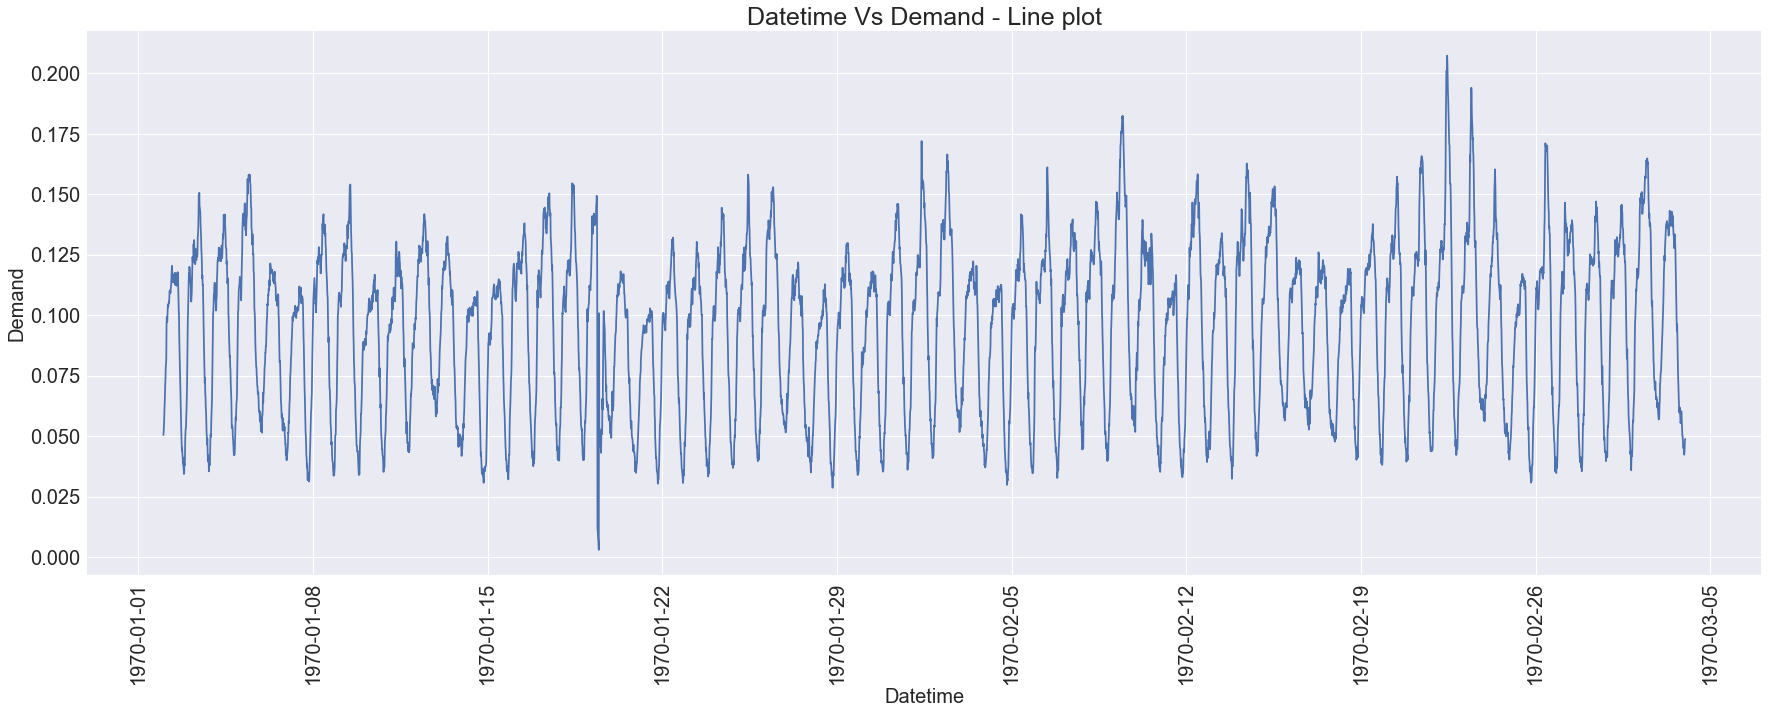

In [10]:
#Line Plot - Timestamp Vs Demand(mean)
plt.figure(figsize=(30,10))
plt.title('Datetime Vs Demand - Line plot',fontsize=25)
plt.xlabel('Datetime',fontsize=20)
plt.ylabel('Demand',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(traf_mgmt_grp['demand'])

In [11]:
#Observation: From the Line plot, its evident that there is no increasing or decreasing trend of demand with respect to datetime.
#However for a shorter duration(61 days), the trend may seem to be stationary
#Day18 has unusual demand drop - below 0.025

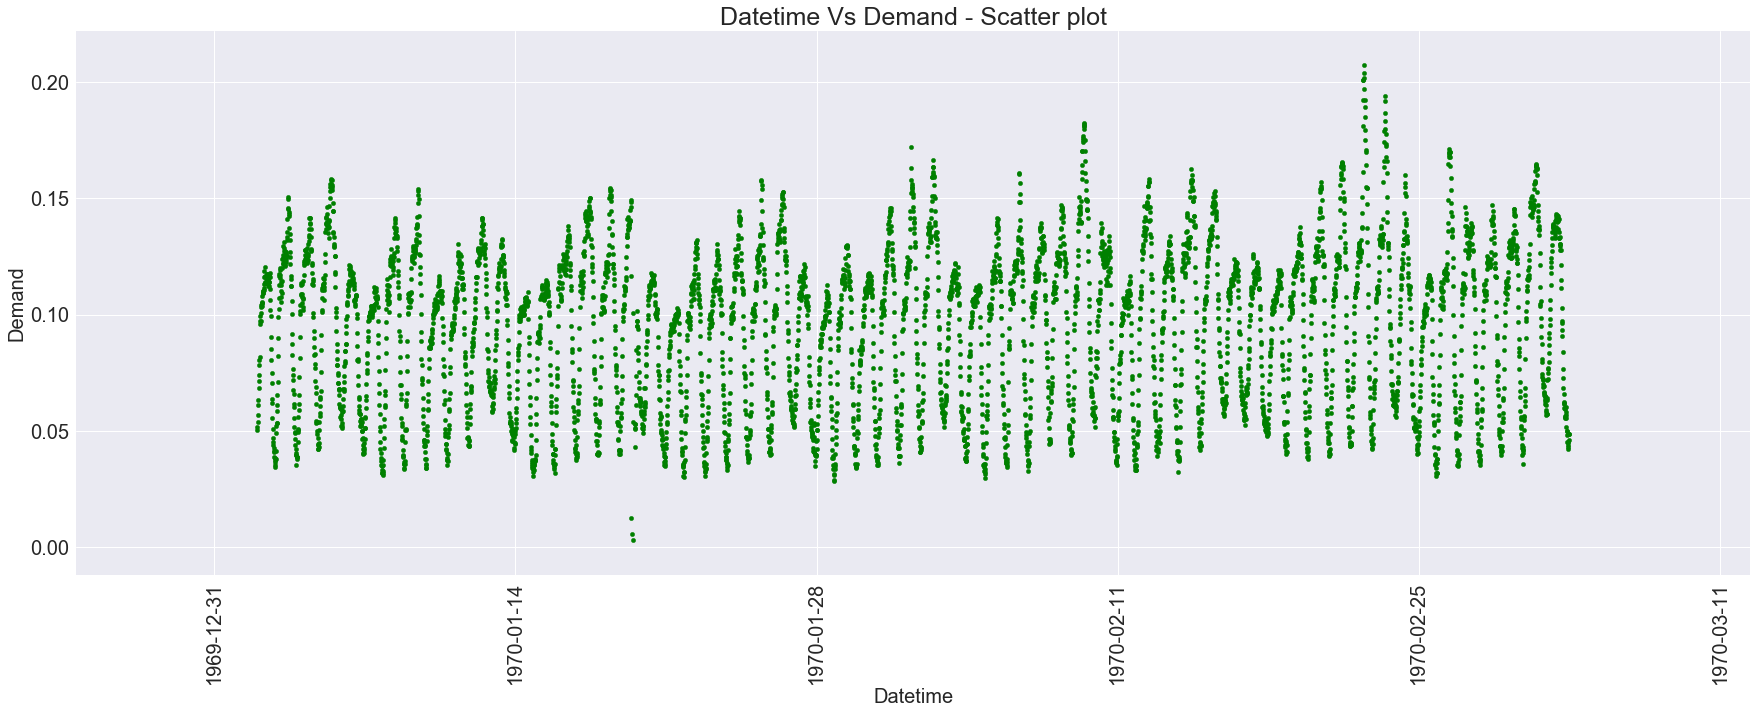

In [12]:
#Scatter Plot - Timestamp Vs Demand(mean)
x=traf_mgmt_grp.index
y=traf_mgmt_grp['demand']
plt.figure(figsize=(30,10))
plt.title('Datetime Vs Demand - Scatter plot',fontsize=25)
plt.xlabel('Datetime',fontsize=20)
plt.ylabel('Demand',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x,y,color='green',s=20)

In [13]:
#Observations: From the Scatter plot, its infered that the distribution would contain outliers

In [14]:
#To visualize demand variations with respect to time on certain days(randomly)
traf_mgmt_tsd1=traf_mgmt_data[traf_mgmt_data['day']==1]
traf_mgmt_tsday1=pd.pivot_table(traf_mgmt_tsd1,index=['time'],values='demand')                                                                                              
traf_mgmt_tsd10=traf_mgmt_data[traf_mgmt_data['day']==10]
traf_mgmt_tsday10=pd.pivot_table(traf_mgmt_tsd10,index=['time'],values='demand')
traf_mgmt_tsd18=traf_mgmt_data[traf_mgmt_data['day']==18]
traf_mgmt_tsday18=pd.pivot_table(traf_mgmt_tsd18,index=['time'],values='demand')
traf_mgmt_tsd30=traf_mgmt_data[traf_mgmt_data['day']==30]
traf_mgmt_tsday30=pd.pivot_table(traf_mgmt_tsd30,index=['time'],values='demand')
traf_mgmt_tsd40=traf_mgmt_data[traf_mgmt_data['day']==40]
traf_mgmt_tsday40=pd.pivot_table(traf_mgmt_tsd40,index=['time'],values='demand')
traf_mgmt_tsd50=traf_mgmt_data[traf_mgmt_data['day']==50]
traf_mgmt_tsday50=pd.pivot_table(traf_mgmt_tsd50,index=['time'],values='demand')
traf_mgmt_tsd60=traf_mgmt_data[traf_mgmt_data['day']==60]
traf_mgmt_tsday60=pd.pivot_table(traf_mgmt_tsd60,index=['time'],values='demand')

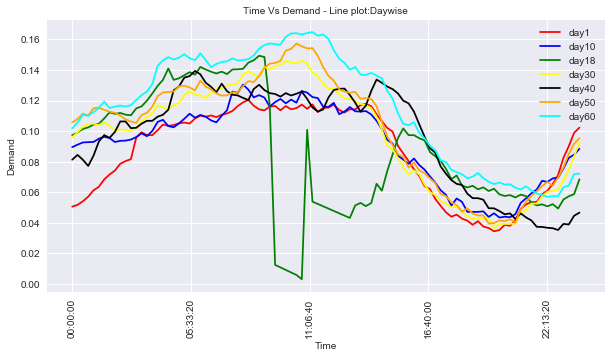

In [15]:
#Line Plot - Timestamp Vs Demand(mean): Selected days
plt.figure(figsize=(10,5))
plt.title('Time Vs Demand - Line plot:Daywise',fontsize=10)
plt.xlabel('Time',fontsize=10)
plt.ylabel('Demand',fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.plot(traf_mgmt_tsday1,color='red',label='day1')
plt.plot(traf_mgmt_tsday10,color='blue',label='day10')
plt.plot(traf_mgmt_tsday18,color='green',label='day18')
plt.plot(traf_mgmt_tsday30,color='yellow',label='day30')
plt.plot(traf_mgmt_tsday40,color='black',label='day40')
plt.plot(traf_mgmt_tsday50,color='orange',label='day50')
plt.plot(traf_mgmt_tsday60,color='cyan',label='day60')
plt.legend(loc='best',fontsize=10)

In [16]:
#Observations: Above Time Vs Demand plot strongly shows that the demand is high between 5 to 12 Hrs approximately with peak at 
#9 to 11 Hrs
#Also there seems an unusual fall in demand on day18 during the peak hours - An Outlier that need to be removed 

In [17]:
#Checking for outliers
traf_mgmt_data.describe()

,day,demand
count,4.206321e+06,4.206321e+06
mean,3.145299e+01,1.050907e-01
std,1.768278e+01,1.592655e-01
min,1.000000e+00,3.092217e-09
25%,1.600000e+01,1.867379e-02
50%,3.200000e+01,5.043463e-02
75%,4.700000e+01,1.208644e-01
max,6.100000e+01,1.000000e+00


In [18]:
#Using quartile and Interquartile ranges for finding outlier
#Interquartile Range=Q3-Q1
IQR=traf_mgmt_data.describe().loc['75%','demand']-traf_mgmt_data.describe().loc['25%','demand']
print('IQR',IQR)
#Low Range=Q1-1.5*IQR
Lowrange_Outlier=traf_mgmt_data.describe().loc['25%','demand']-(1.5*IQR)
print('Low Range Outlier',Lowrange_Outlier)
#High Range=Q3+1.5*IQR
Highrange_Outlier=traf_mgmt_data.describe().loc['75%','demand']+(1.5*IQR)
print('High Range Outlier',Highrange_Outlier)

IQR 0.102190576639
Low Range Outlier -0.134612077355
High Range Outlier 0.274150229202


In [19]:
#Observation: Comparing the Outliers with Minimum and Maximum values in Describe, its evident that there are outliers in 
#High Range

In [20]:
#Removing the outlier
traf_mgmt_outlier=traf_mgmt_data['demand']>Highrange_Outlier
traf_mgmt_nooutlier=traf_mgmt_data[-traf_mgmt_outlier]

In [21]:
#Also the unusual drop in day18 is removed
traf_mgmt_nooutlier=traf_mgmt_nooutlier[traf_mgmt_nooutlier['demand']>0.025]

In [22]:
#Groupby after removing the outliers
traf_mgmt_grp=traf_mgmt_nooutlier.groupby(traf_mgmt_nooutlier.index).mean()
traf_mgmt_grp

,day,demand
datetim,,
1970-01-02 00:00:00,1,0.072431
1970-01-02 00:15:00,1,0.075654
1970-01-02 00:30:00,1,0.076935
1970-01-02 00:45:00,1,0.074770
1970-01-02 01:00:00,1,0.076343
1970-01-02 01:15:00,1,0.079299
1970-01-02 01:30:00,1,0.081153
1970-01-02 01:45:00,1,0.082159
1970-01-02 02:00:00,1,0.083470


In [23]:
#Creating pandas Series using the given DataFrame
traf_mgmt_series = pd.Series(traf_mgmt_grp['demand'], index=traf_mgmt_grp.index)
traf_mgmt_series.head()

datetim
1970-01-02 00:00:00    0.072431
1970-01-02 00:15:00    0.075654
1970-01-02 00:30:00    0.076935
1970-01-02 00:45:00    0.074770
1970-01-02 01:00:00    0.076343
Name: demand, dtype: float64

C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).mean()
C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).std()


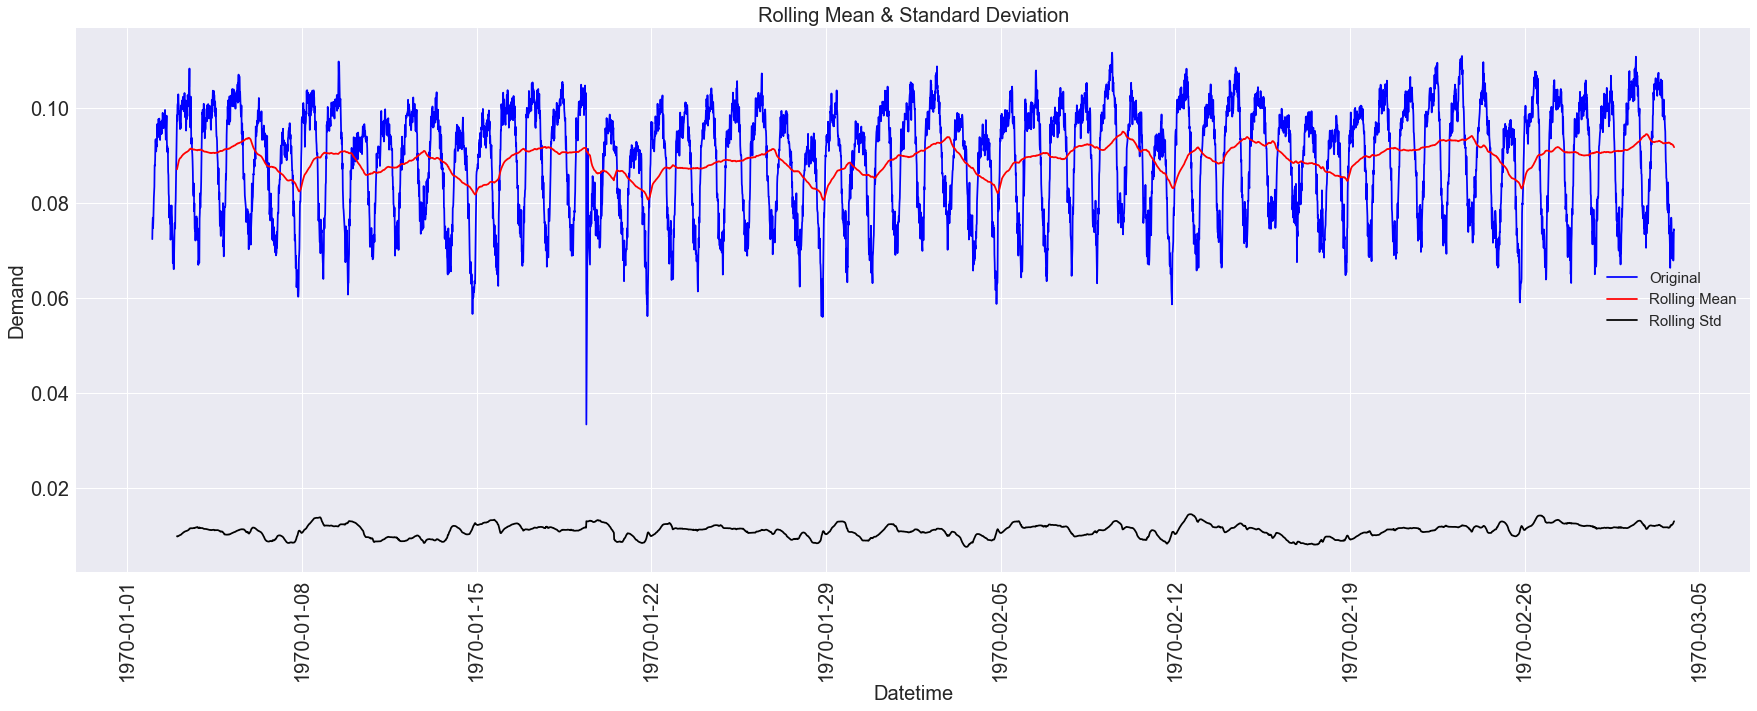

Results of Dickey-Fuller Test:
Test Statistic                -1.726027e+01
p-value                        5.947391e-30
#Lags Used                     2.500000e+01
Number of Observations Used    5.819000e+03
Critical Value (1%)           -3.431474e+00
Critical Value (5%)           -2.862037e+00
Critical Value (10%)          -2.567034e+00
dtype: float64


In [24]:
#Checking Stationarity: Using Rolling mean/std and Dickey-Fuller Test
#Plotting mean and variance - To check how far they are constant over time(Stationary time series) 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics 

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rollmean = pd.rolling_mean(timeseries, window=96)
    rollstd = pd.rolling_std(timeseries, window=96)

    #Plot rolling statistics:
    plt.figure(figsize=(30,10))
    plt.xlabel('Datetime',fontsize=20)
    plt.ylabel('Demand',fontsize=20)
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollmean, color='red', label='Rolling Mean')
    std = plt.plot(rollstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best',fontsize=15)
    plt.title('Rolling Mean & Standard Deviation',fontsize=20)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

#Calling the function that checks stationarity
test_stationarity(traf_mgmt_series)

In [25]:
#Observation: No Increasing/Decreasing trend in mean
#Variation in Standard Deviation is low
#Test Static is lesser than Critical Values and is more negative - Trend Stationary
#p-value is less than 0.05 - Trend Stationary
#Variation in mean need to be reduced

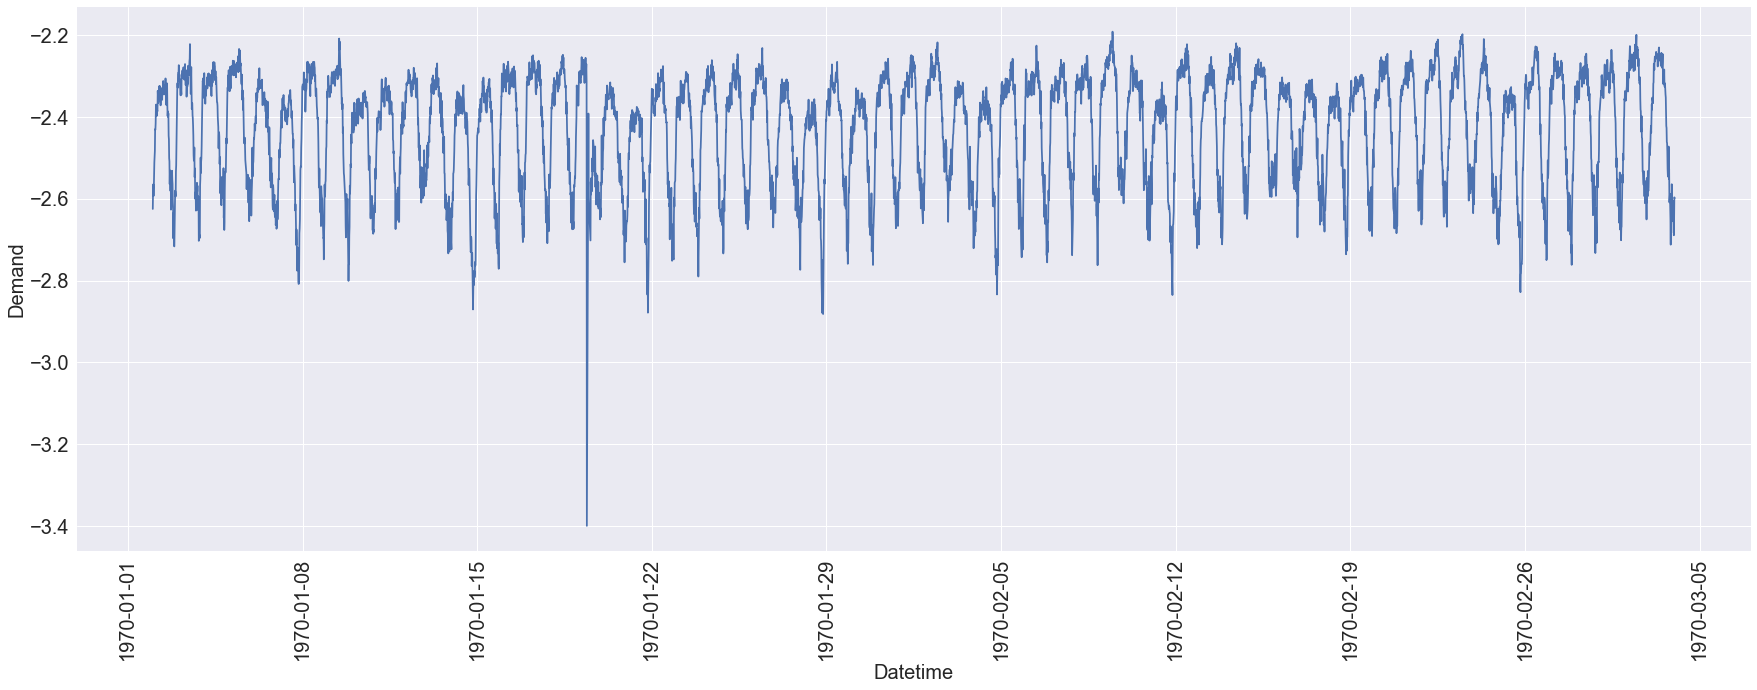

In [27]:
#Log transformation of data

traf_mgmt_serieslog = np.log(traf_mgmt_series)
plt.figure(figsize=(30,10))
plt.xlabel('Datetime',fontsize=20)
plt.ylabel('Demand',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(traf_mgmt_serieslog )

C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).mean()
  from ipykernel import kernelapp as app


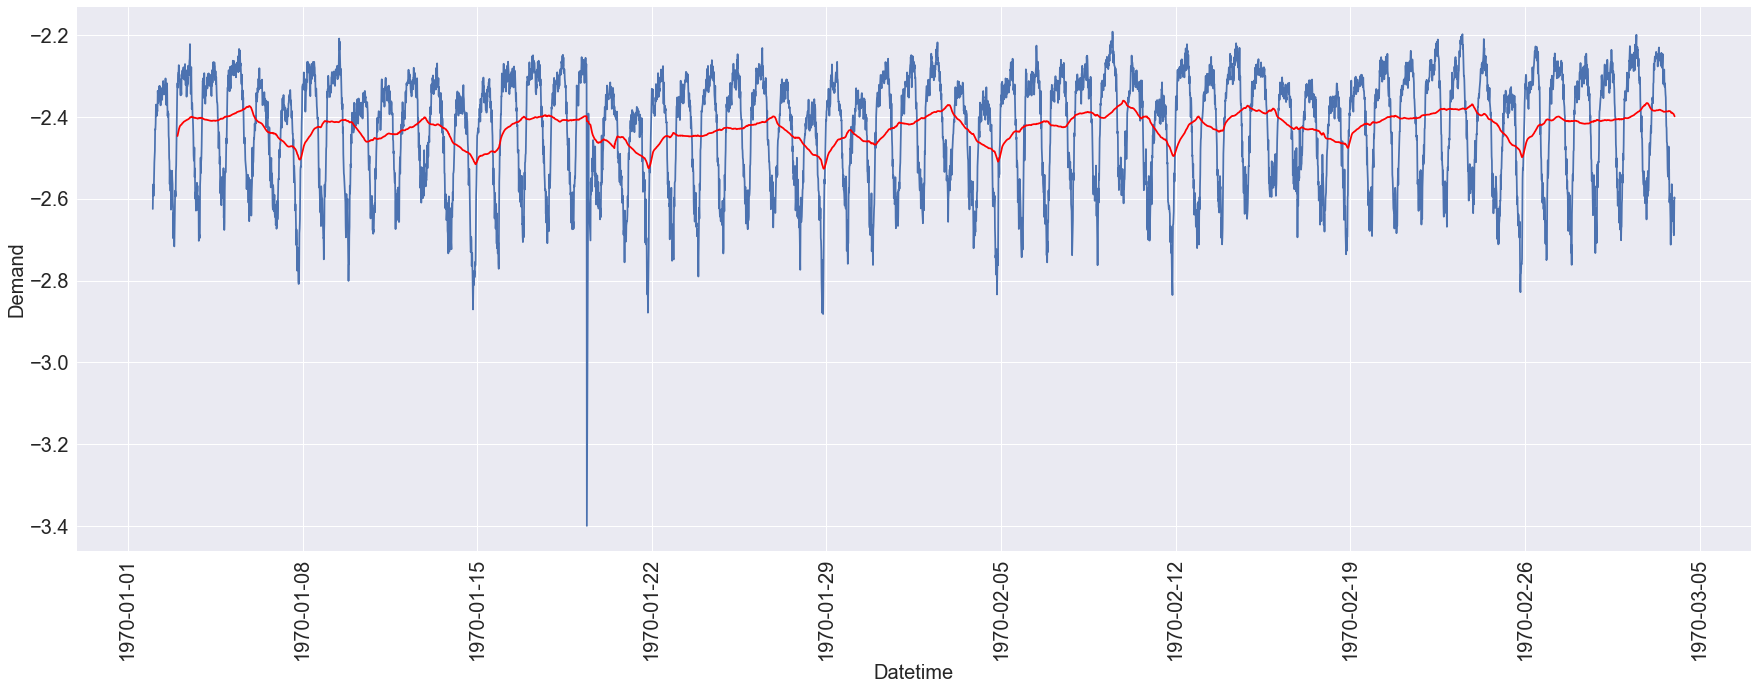

In [28]:
#Eliminating noise by Smoothing - taking rolling averages
traf_mgmt_seriesmovavg = pd.rolling_mean(traf_mgmt_serieslog,96)
plt.figure(figsize=(30,10))
plt.xlabel('Datetime',fontsize=20)
plt.ylabel('Demand',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(traf_mgmt_serieslog)
plt.plot(traf_mgmt_seriesmovavg, color='red')

C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).mean()
C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).std()


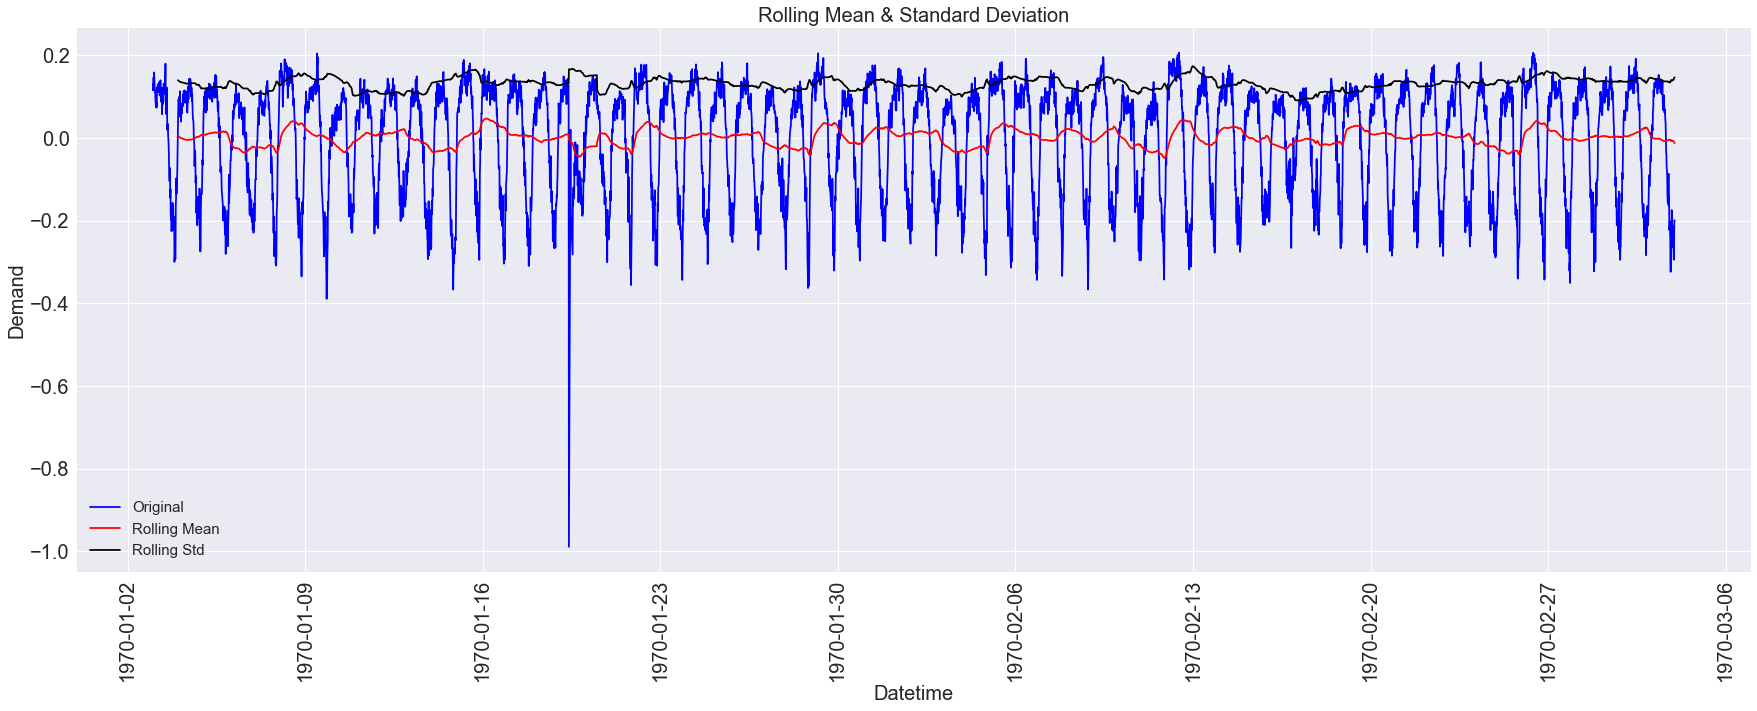

Results of Dickey-Fuller Test:
Test Statistic                -1.617181e+01
p-value                        4.356907e-29
#Lags Used                     3.400000e+01
Number of Observations Used    5.715000e+03
Critical Value (1%)           -3.431495e+00
Critical Value (5%)           -2.862046e+00
Critical Value (10%)          -2.567039e+00
dtype: float64


In [30]:
#Smoothing to reduce variation in mean
traf_mgmt_seriesmovavg_diff=traf_mgmt_serieslog-traf_mgmt_seriesmovavg 
traf_mgmt_seriesmovavg_diff.dropna(inplace=True)

#Calling the function that checks stationarity after smoothing
test_stationarity(traf_mgmt_seriesmovavg_diff)

In [48]:
#Observation: This looks like a much better series. The rolling values appear to be varying slightly and seems smoothened

C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).mean()
C:\Users\nlakshman\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=96,center=False).std()


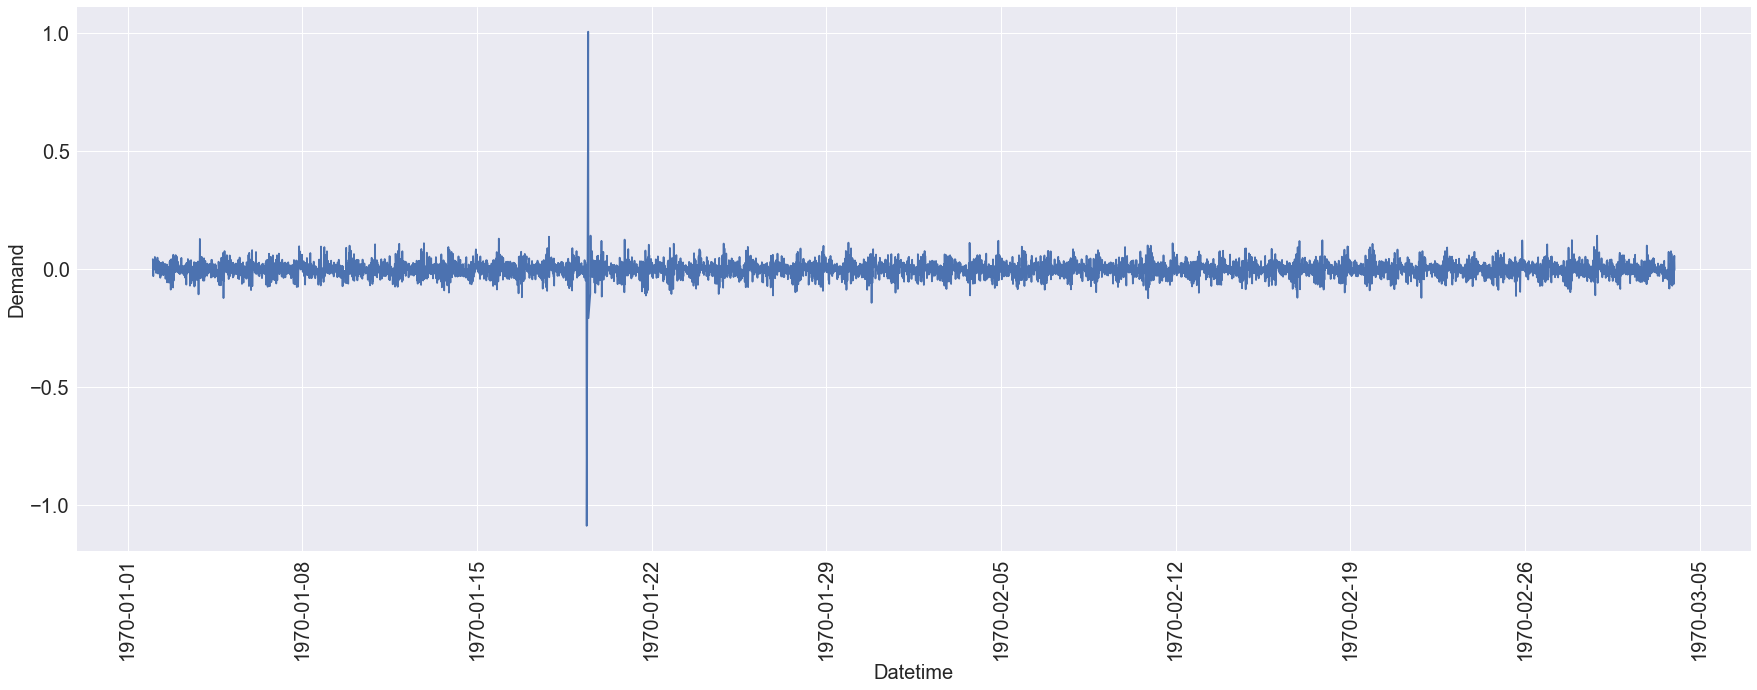

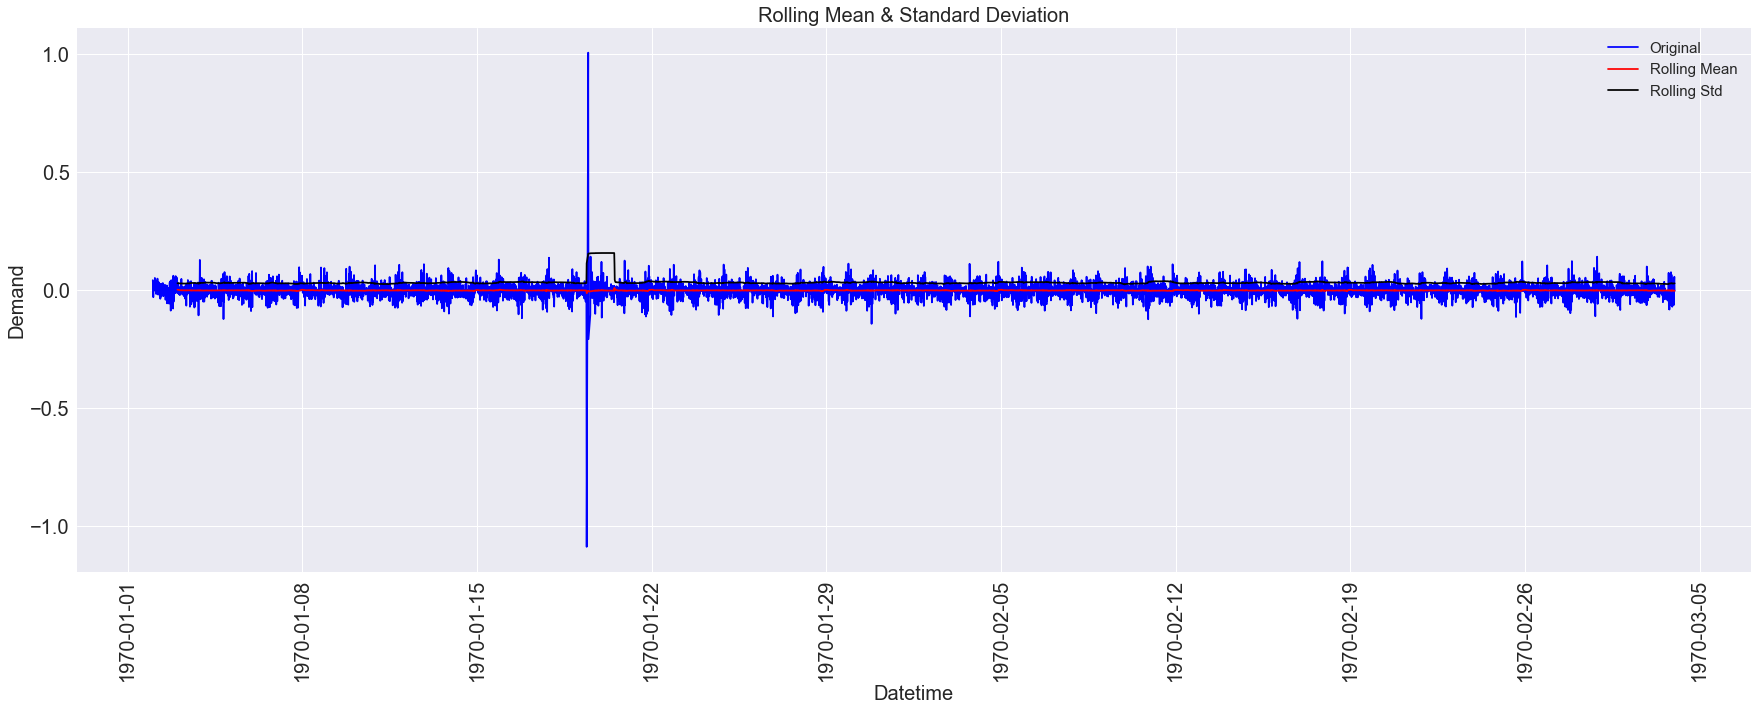

Results of Dickey-Fuller Test:
Test Statistic                -1.709916e+01
p-value                        7.497928e-30
#Lags Used                     3.400000e+01
Number of Observations Used    5.809000e+03
Critical Value (1%)           -3.431476e+00
Critical Value (5%)           -2.862038e+00
Critical Value (10%)          -2.567035e+00
dtype: float64


In [31]:
#Eliminating Seasonality by differencing the observation at a particular instant and that of the previous instant
traf_mgmt_serieslogdiff=traf_mgmt_serieslog - traf_mgmt_serieslog.shift()
plt.figure(figsize=(30,10))
plt.xlabel('Datetime',fontsize=20)
plt.ylabel('Demand',fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.plot(traf_mgmt_serieslogdiff)
traf_mgmt_serieslogdiff.dropna(inplace=True)

#Calling the function that checks stationarity after differencing
test_stationarity(traf_mgmt_serieslogdiff)

In [120]:
#We can see that the mean and std variations have small variations with time. No Seasonality being observed.
#thus the TS is stationary 

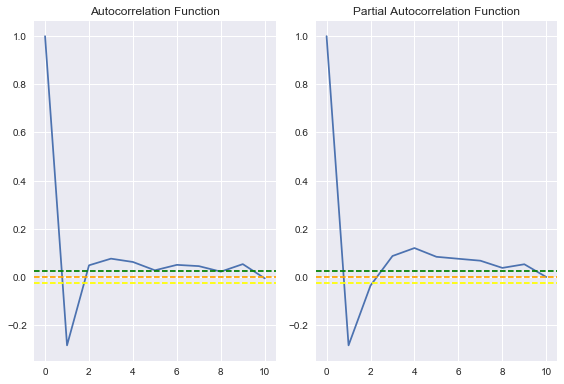

In [32]:
#Plots to determine the parameters of the ARIMA model(p,d,q)
#ACF and PACF plots after differencing 
from statsmodels.tsa.stattools import acf, pacf
traf_mgmt_acf = acf(traf_mgmt_serieslogdiff, nlags=10)
traf_mgmt_pacf = pacf(traf_mgmt_serieslogdiff, nlags=10, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(traf_mgmt_acf )
plt.axhline(y=0,linestyle='--',color='orange')
plt.axhline(y=-1.96/np.sqrt(len(traf_mgmt_serieslogdiff)),linestyle='--',color='yellow')
plt.axhline(y=1.96/np.sqrt(len(traf_mgmt_serieslogdiff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(traf_mgmt_pacf )
plt.axhline(y=0,linestyle='--',color='orange')
plt.axhline(y=-1.96/np.sqrt(len(traf_mgmt_serieslogdiff)),linestyle='--',color='yellow')
plt.axhline(y=1.96/np.sqrt(len(traf_mgmt_serieslogdiff)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p = q= 1 and d =1(diff order of 1)

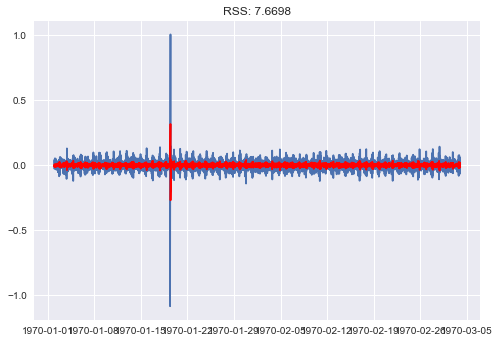

In [33]:
#ARIMA model
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(traf_mgmt_serieslog , order=(1, 1, 1))  
traf_mgmt_ARIMA = model.fit(disp=-1)  
plt.plot(traf_mgmt_serieslogdiff)
plt.plot(traf_mgmt_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((traf_mgmt_ARIMA.fittedvalues-traf_mgmt_serieslogdiff)**2))

In [34]:
#Adding noise and seasonality to the predicted residuals 
#Scaling it back to the original values  

In [35]:
#Predicated Residuals
traf_mgmt_ARIMA_diff = pd.Series(traf_mgmt_ARIMA.fittedvalues, copy=True)
traf_mgmt_ARIMA_diff.head()

datetim
1970-01-02 00:15:00    0.000003
1970-01-02 00:30:00   -0.012416
1970-01-02 00:45:00   -0.005810
1970-01-02 01:00:00    0.007890
1970-01-02 01:15:00   -0.005480
dtype: float64

In [36]:
#cumsum of predicted values
traf_mgmt_ARIMA_diff_cumsum = traf_mgmt_ARIMA_diff.cumsum()
traf_mgmt_ARIMA_diff_cumsum.head()

datetim
1970-01-02 00:15:00    0.000003
1970-01-02 00:30:00   -0.012414
1970-01-02 00:45:00   -0.018224
1970-01-02 01:00:00   -0.010334
1970-01-02 01:15:00   -0.015814
dtype: float64

In [37]:
#To introduce back the seasonality

traf_mgmt_ARIMA_log=pd.Series(traf_mgmt_serieslog.ix[0], index=traf_mgmt_serieslog.index)
traf_mgmt_ARIMA_log = traf_mgmt_ARIMA_log.add(traf_mgmt_ARIMA_diff_cumsum,fill_value=0)
traf_mgmt_ARIMA_log.head()

datetim
1970-01-02 00:00:00   -2.625120
1970-01-02 00:15:00   -2.625118
1970-01-02 00:30:00   -2.637534
1970-01-02 00:45:00   -2.643344
1970-01-02 01:00:00   -2.635454
dtype: float64

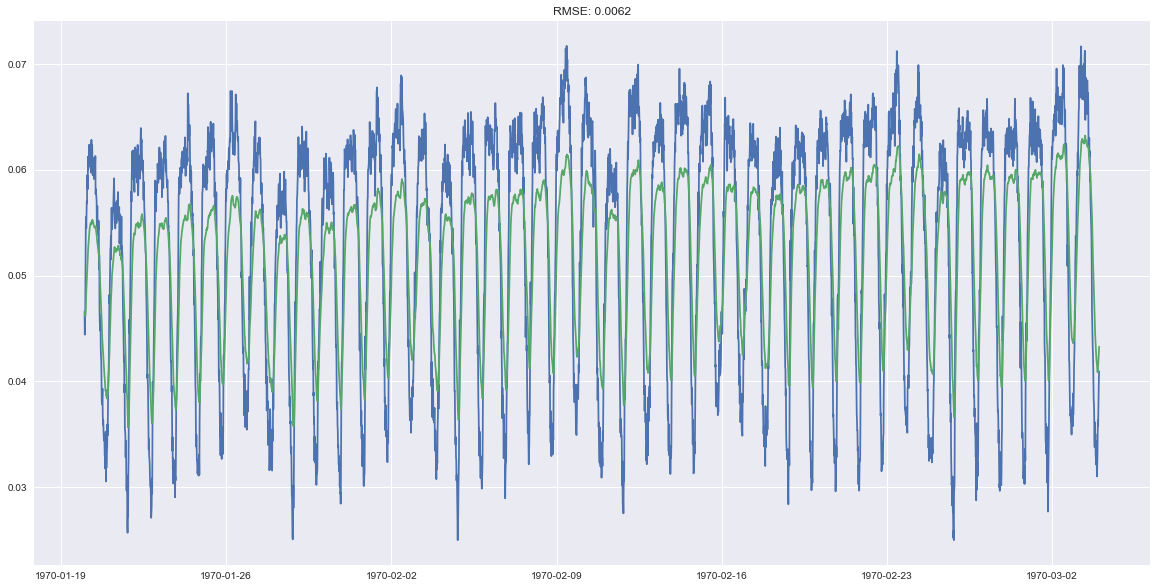

In [65]:
#Check with originals
traf_mgmt_ARIMA_pred=np.exp(traf_mgmt_ARIMA_log)
plt.figure(figsize=(20,10))
plt.plot(traf_mgmt_tseries)
plt.plot(traf_mgmt_ARIMA_pred)
plt.title('RMSE: %.4f'% np.sqrt(sum((traf_mgmt_ARIMA_pred-traf_mgmt_tseries)**2)/len(traf_mgmt_tseries)))

datetim
1970-02-11 00:00:00    0.054816
1970-02-11 00:15:00    0.054826
1970-02-11 00:30:00    0.055505
1970-02-11 00:45:00    0.056376
1970-02-11 01:00:00    0.056558
1970-02-11 01:15:00    0.057326
1970-02-11 01:30:00    0.059138
1970-02-11 01:45:00    0.061973
1970-02-11 02:00:00    0.064910
1970-02-11 02:15:00    0.067827
1970-02-11 02:30:00    0.069975
1970-02-11 02:45:00    0.072155
1970-02-11 03:00:00    0.072909
1970-02-11 03:15:00    0.073750
1970-02-11 03:30:00    0.075020
1970-02-11 03:45:00    0.077592
1970-02-11 04:00:00    0.079307
1970-02-11 04:15:00    0.081414
1970-02-11 04:30:00    0.082910
1970-02-11 04:45:00    0.084548
1970-02-11 05:00:00    0.085216
1970-02-11 05:15:00    0.086615
1970-02-11 05:30:00    0.087140
1970-02-11 05:45:00    0.087784
1970-02-11 06:00:00    0.087706
1970-02-11 06:15:00    0.088201
1970-02-11 06:30:00    0.088548
1970-02-11 06:45:00    0.090250
1970-02-11 07:00:00    0.090825
1970-02-11 07:15:00    0.091621
dtype: float64


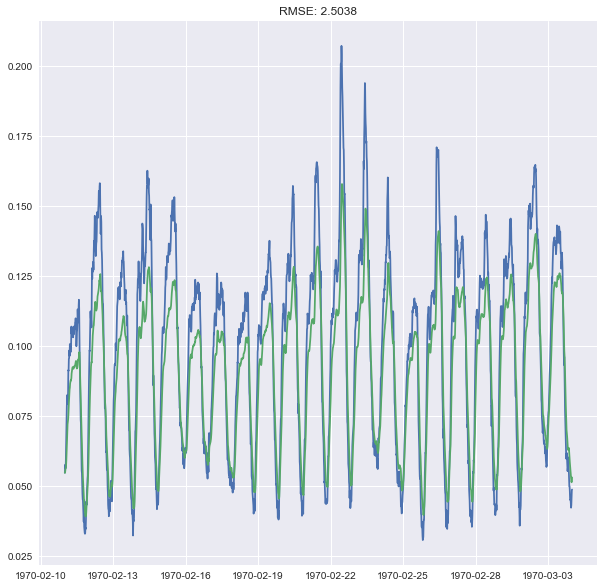

In [40]:
#Outputting the model

def ARIMA_mod(traf_mgmt_series):
    model = ARIMA(traf_mgmt_series, order=(1,1,1))  
    traf_mgmt_ARIMAmodtst = model.fit(disp=-1)
    #Getting the residuals
    traf_mgmt_ARIMA_resi= pd.Series(traf_mgmt_ARIMAmodtst.fittedvalues, copy=True)
    #cumsum of residuals
    traf_mgmt_ARIMA_resi_cumsum= traf_mgmt_ARIMA_resi.cumsum()
    #adding residuals to original
    traf_mgmt_series_logtst=pd.Series(traf_mgmt_series.ix[0], index=traf_mgmt_series.index)
    traf_mgmt_ARIMA_logtst = traf_mgmt_series_logtst.add(traf_mgmt_ARIMA_resi_cumsum,fill_value=0)
    #Reversing Log
    traf_mgmt_ARIMA_predtst=np.exp(traf_mgmt_ARIMA_logtst)
    print(traf_mgmt_ARIMA_predtst.head(30))
    plt.figure(figsize=(10,10))
    plt.plot(traf_mgmt_testseries)
    plt.plot(traf_mgmt_ARIMA_predtst)
    plt.title('RMSE: %.4f'% np.sqrt(sum((traf_mgmt_ARIMA_predtst-traf_mgmt_series)**2)/len(traf_mgmt_series)))

#Calling ARIMA model using the Test Series
traf_mgmt_datatest=traf_mgmt_data[traf_mgmt_data['day']>40]
traf_mgmt_testgrp=traf_mgmt_datatest.groupby(traf_mgmt_datatest.index).mean()
traf_mgmt_testseries=pd.Series(traf_mgmt_testgrp['demand'], index=traf_mgmt_testgrp.index)

traf_mgmt_testserieslog = np.log(traf_mgmt_testseries)

ARIMA_mod(traf_mgmt_testserieslog)

